# Installing the Tensorflow Object Detection API

#### Clone the repository and install dependencies.

In [30]:
# !git clone https://github.com/tensorflow/models --single-branch --branch r1.13.0
# !pip install Cython contextlib2 pillow lxml jupyter matplotlib

In [31]:
# !pip uninstall -y tensorflow tensorflow_gpu
# !pip install tensorflow_gpu==1.13.1

#### Install the COCO API

COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, and caption generation. If you want to use the data-set and evaluation metrics you need to clone the cocoapi repository and copy the pycocotools subfolder to the tensorflow/models/research directory.

If you are on Linux or MAC execute the following cell:

In [23]:
# !git clone https://github.com/cocodataset/cocoapi.git
# %cd cocoapi/PythonAPI
# !make
# %cd ../../
# %cp -r cocoapi/PythonAPI/pycocotools models/research/

[WinError 3] The system cannot find the path specified: 'cocoapi/PythonAPI'
C:\Users\toshiba\Desktop\android studio\CAS-NN\models\research
C:\Users\toshiba\Desktop\android studio\CAS-NN


make: *** No targets specified and no makefile found.  Stop.


If make fails it might be because you have python 2 and python3 installed and the python command tries to access the wrong version. To fix this just change the command in the cocoapi/PythonAPI/Makefile file.

Using make won't work on windows. To install the cocoapi on windows the following command can be used:

In [5]:
# !pip install "git+https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI"

#### Protobuf Installation/Compilation

In [7]:
# !wget https://github.com/protocolbuffers/protobuf/releases/download/v3.11.2/protoc-3.11.2-linux-x86_64.zip

# !unzip protoc-3.11.2-linux-x86_64.zip

In [7]:
# %cp bin/protoc models/research

C:\Users\toshiba\Desktop\android studio\CAS-NN\models\research


In [5]:
# import os
# import subprocess
# directory = 'object_detection\\protos\\'
# protoc_path = '.\protoc'
# for file in os.listdir(directory):
#     print(os.getcwd())
#     if file.endswith(".proto"):
#         subprocess.call(protoc_path+" "+directory+"/"+file+" --python_out=.")

In [9]:
# %ls object_detection\protos\

#### Add necessary environment variables and finish Tensorflow Object Detection API installation

In [91]:
# !set PYTHONPATH=C:\Users\toshiba\Desktop\android studio\CAS-NN\models\
# !set PYTHONPATH=C:\Users\toshiba\Desktop\android studio\CAS-NN\models\research
# !set PYTHONPATH=C:\Users\toshiba\Desktop\android studio\CAS-NN\models\research\slim
# !py setup.py build
# !py setup.py install

In [56]:
# %cd models/research
!set PYTHONPATH=C:\Users\toshiba\Desktop\android studio\CAS-NN\models\research;C:\Users\toshiba\Desktop\android studio\CAS-NN\models\research\slim
working_dir = os.getcwd()
path = working_dir + ':' + working_dir + '/slim'
os.environ['PYTHONPATH'] = path


Lastly we can check if everything is working by running the model_builder_test.py script (only works with Tensorflow 1.x)

In [92]:
!py object_detection/builders/model_builder_test.py

C:\Users\toshiba\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\toshiba\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\toshiba\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tosh

In [68]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


In [69]:
%matplotlib inline
from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util

In [86]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.getcwd() + '\object_detection\data\mscoco_label_map.pbtxt'



opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())

In [87]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
      
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)




In [88]:
PATH_TO_TEST_IMAGES_DIR = ''
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict




C:\Users\toshiba\Desktop\android studio\CAS-NN\models\research


<Figure size 864x576 with 0 Axes>

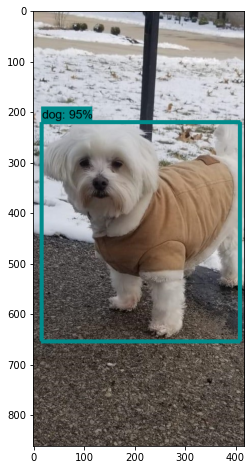

In [93]:
%matplotlib inline
print(os.getcwd())
for image_path in TEST_IMAGE_PATHS:
  image = Image.open('../../image2.JPG')
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)
plt.show()
